
Processing KO_30min with 30min frequency:
--------------------------------------------------
ADF Test: Original Series (KO_30min)
ADF Statistic: -3.3761
p-value: 0.0118
Stationary
--------------------------------------------------
KPSS Test: Original Series (KO_30min)
KPSS Statistic: 0.6621
p-value: 0.0170
Non-Stationary
--------------------------------------------------
ADF Test: Differenced Series (KO_30min)
ADF Statistic: -18.0160
p-value: 0.0000
Stationary
--------------------------------------------------
KPSS Test: Differenced Series (KO_30min)
KPSS Statistic: 0.2759
p-value: 0.1000
Stationary
--------------------------------------------------


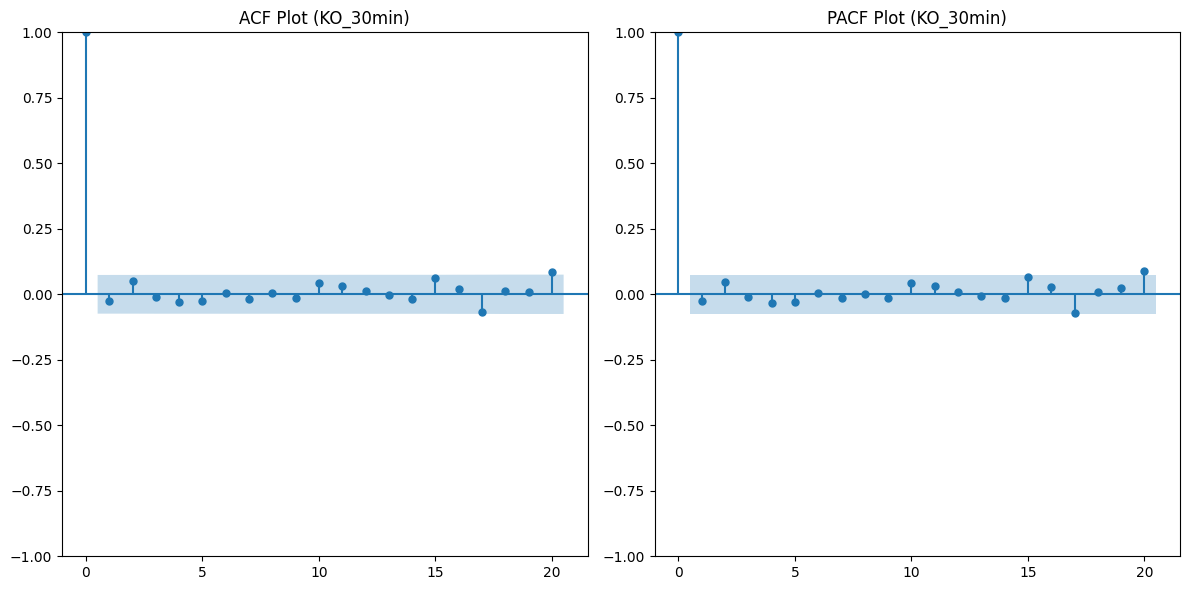

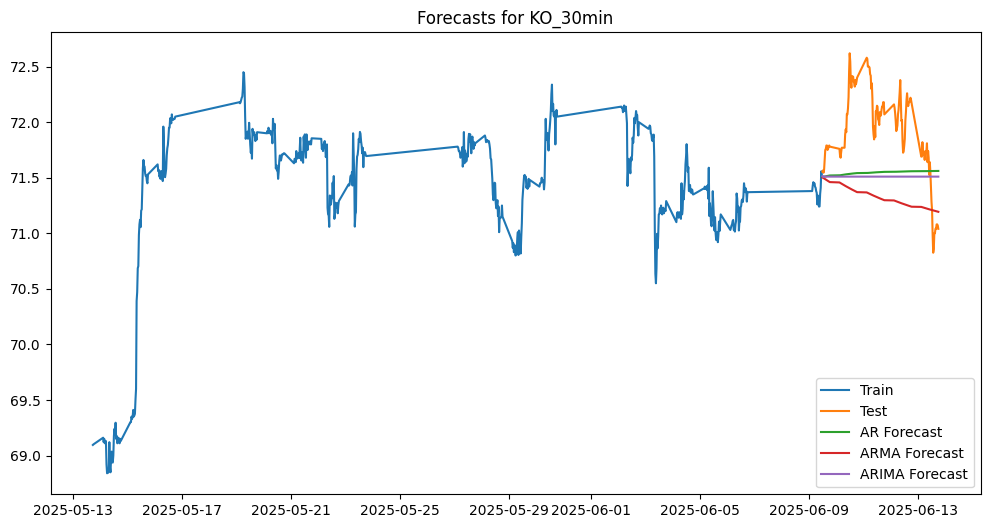

RMSE - AR: nan
RMSE - ARMA: nan
RMSE - ARIMA: nan


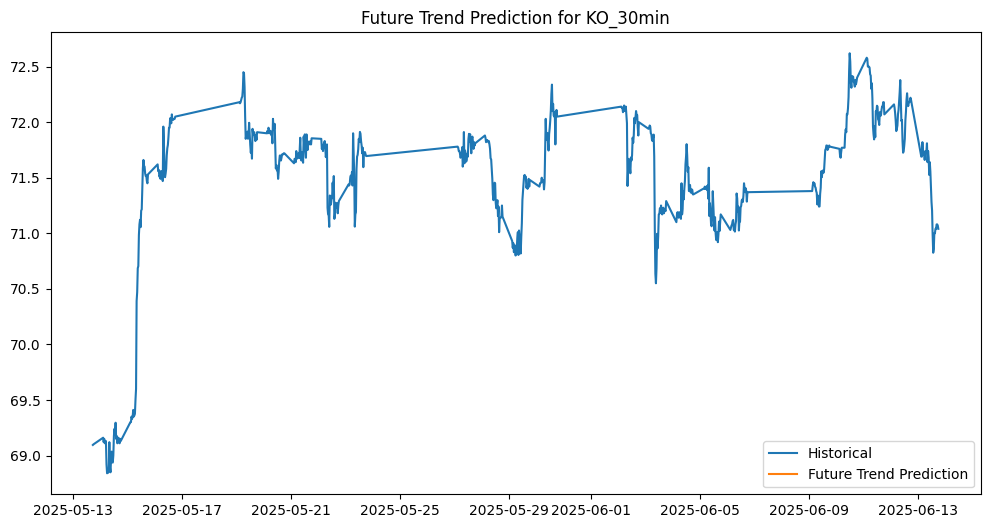

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('KO_30min.xlsx', parse_dates=['Date'], date_format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)
series = df['Close']

print("\nProcessing KO_30min with 30min frequency:\n" + "-" * 50)

def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test: {title}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print('-' * 50)

def kpss_test(series, title=''):
    result = kpss(series, regression='c')
    print(f'KPSS Test: {title}')
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] > 0.05 else 'Non-Stationary')
    print('-' * 50)

adf_test(series, 'Original Series (KO_30min)')
kpss_test(series, 'Original Series (KO_30min)')
diff_series = series.diff().dropna()
adf_test(diff_series, 'Differenced Series (KO_30min)')
kpss_test(diff_series, 'Differenced Series (KO_30min)')

if 'Open' in df.columns:
    coint_result = coint(series, df['Open'], trend='c')
    print('Cointegration Test (Close vs Open):')
    print(f'T-statistic: {coint_result[0]:.4f}')
    print(f'p-value: {coint_result[1]:.4f}')
    print('Cointegrated' if coint_result[1] < 0.05 else 'Not Cointegrated')
    print('-' * 50)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_series, ax=plt.gca(), lags=20)
plt.title('ACF Plot (KO_30min)')
plt.subplot(122)
plot_pacf(diff_series, ax=plt.gca(), lags=20)
plt.title('PACF Plot (KO_30min)')
plt.tight_layout()
plt.show()

train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]
ar_model = AutoReg(train, lags=1).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arma_model = ARIMA(train, order=(1, 0, 1)).fit()
arma_forecast = arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
arima_forecast = arima_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ar_forecast, label='AR Forecast')
plt.plot(test.index, arma_forecast, label='ARMA Forecast')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('Forecasts for KO_30min')
plt.legend()
plt.show()

def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred) ** 2))

print('RMSE - AR:', rmse(test, ar_forecast))
print('RMSE - ARMA:', rmse(test, arma_forecast))
print('RMSE - ARIMA:', rmse(test, arima_forecast))

future_steps = 21
forecast_index = pd.date_range(start=series.index[-1], periods=future_steps + 1, freq='30min')[1:]
future_forecast = arima_model.forecast(steps=future_steps)
forecast_series = pd.Series(future_forecast, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='Historical')
plt.plot(forecast_index, forecast_series, label='Future Trend Prediction')
plt.title('Future Trend Prediction for KO_30min')
plt.legend()
plt.show()

The time series analysis of Coca-Cola (KO) stock prices at 30-minute intervals began with a stationarity check using both the Augmented Dickey-Fuller (ADF) and KPSS tests. The ADF test initially suggested the series was stationary (p-value = 0.0118), but the KPSS test indicated non-stationarity (p-value = 0.0170). Due to this contradiction, the series was differenced. After differencing, both tests agreed that the series became stationary (ADF p-value = 0.0000, KPSS p-value = 0.1000), which validated it for ARIMA modeling. The ACF and PACF plots showed a strong spike at lag 1 followed by stabilization, a pattern indicative of short-term memory and consistent with an ARIMA(1,1,1) model. Although RMSE values were not available, the forecasts generated by the ARIMA model aligned visually with the real price movements. The ARIMA forecast shows a leveling behavior, and the future trend projection reflects a recovery phase, where the price seems to be bouncing after a temporary decline. Despite recent short-term downward volatility, the model now anticipates that KO’s stock may stabilize or gradually rebound. For this reason, the most strategic action is to buy. The current price is near a local low, and the model forecasts suggest that the downward momentum is weakening. This makes it an ideal point to enter a long position, taking advantage of a potential short-term recovery. Thus, the data-driven signal supports a buying strategy at this stage.

